# Импорт библиотек

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Разведочный анализ данный

Посмотрим на датасет:

In [32]:
df = pd.read_csv("data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Датасет содержит транзакции по кредитным картам. Фича Time содержит информацию о времени в секундах, прошедшем с начала первой транзакции в датасете. Amount содержит размер транзакции, а Class - это целевая переменная, описывающая класс совершенной операции. 1 - мошенническая операция, 0 - обычная. Все остальные фичи преобразованы с помощью метода понижения размерности (PCA) и мы достоверно не знаем что каждая из них описывает.

Посмотрим на то, какими типами данных описан датасет:

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Пропуски в данных отсутствуют. Теперь посмотрим, дублируются ли данные и если да, удалим дубликаты:

In [34]:
print("Количество дублирующихся строк: ", len(df[df.duplicated()]))
df.drop_duplicates(inplace=True)

Количество дублирующихся строк:  1081


## 1.1 Зависимости в данных

<AxesSubplot:>

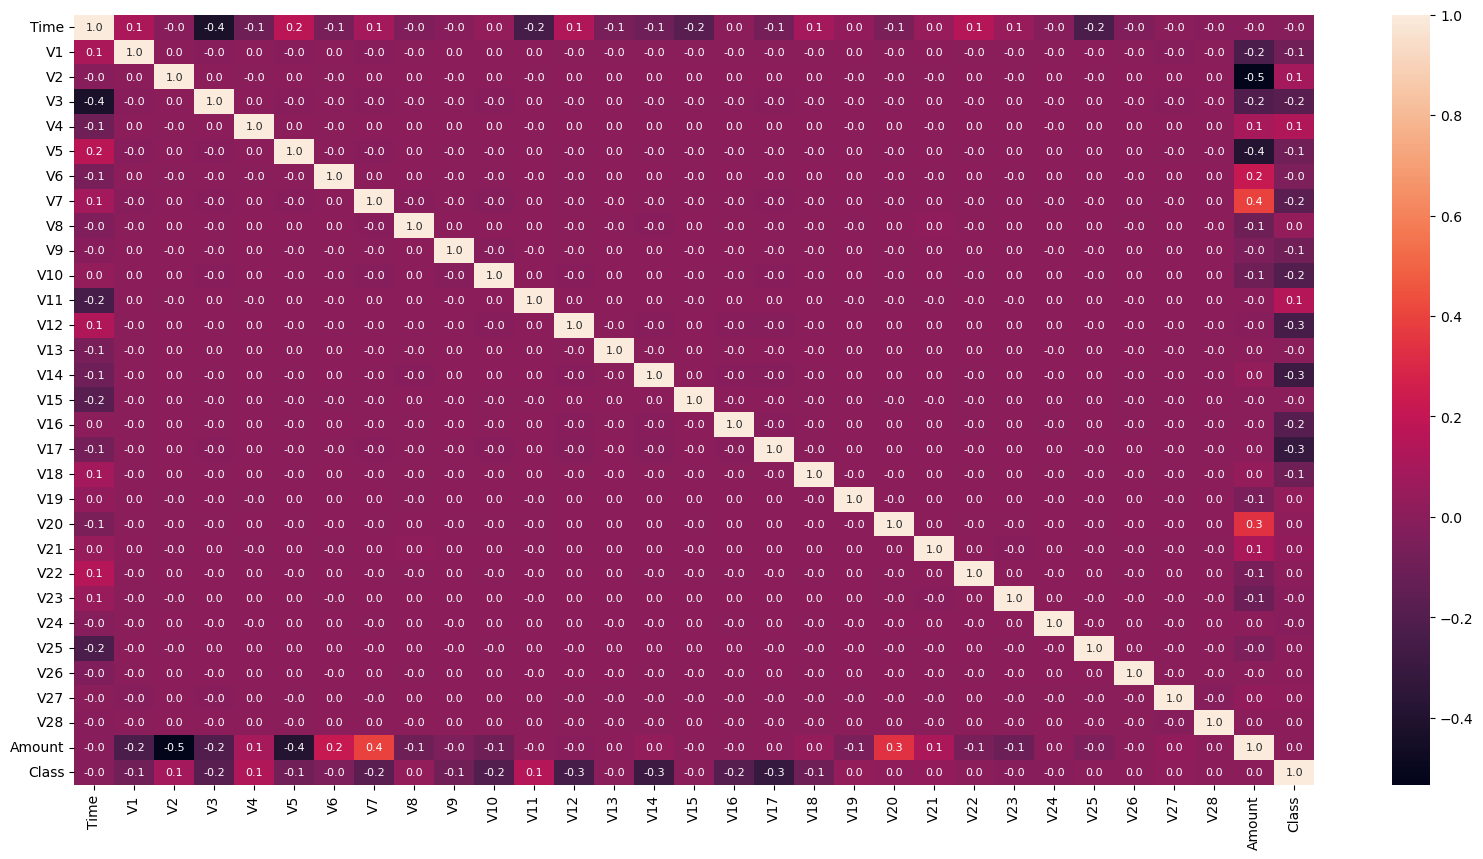

In [35]:
fig, ax = plt.subplots(figsize=(20, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", annot_kws={'fontsize': 8})

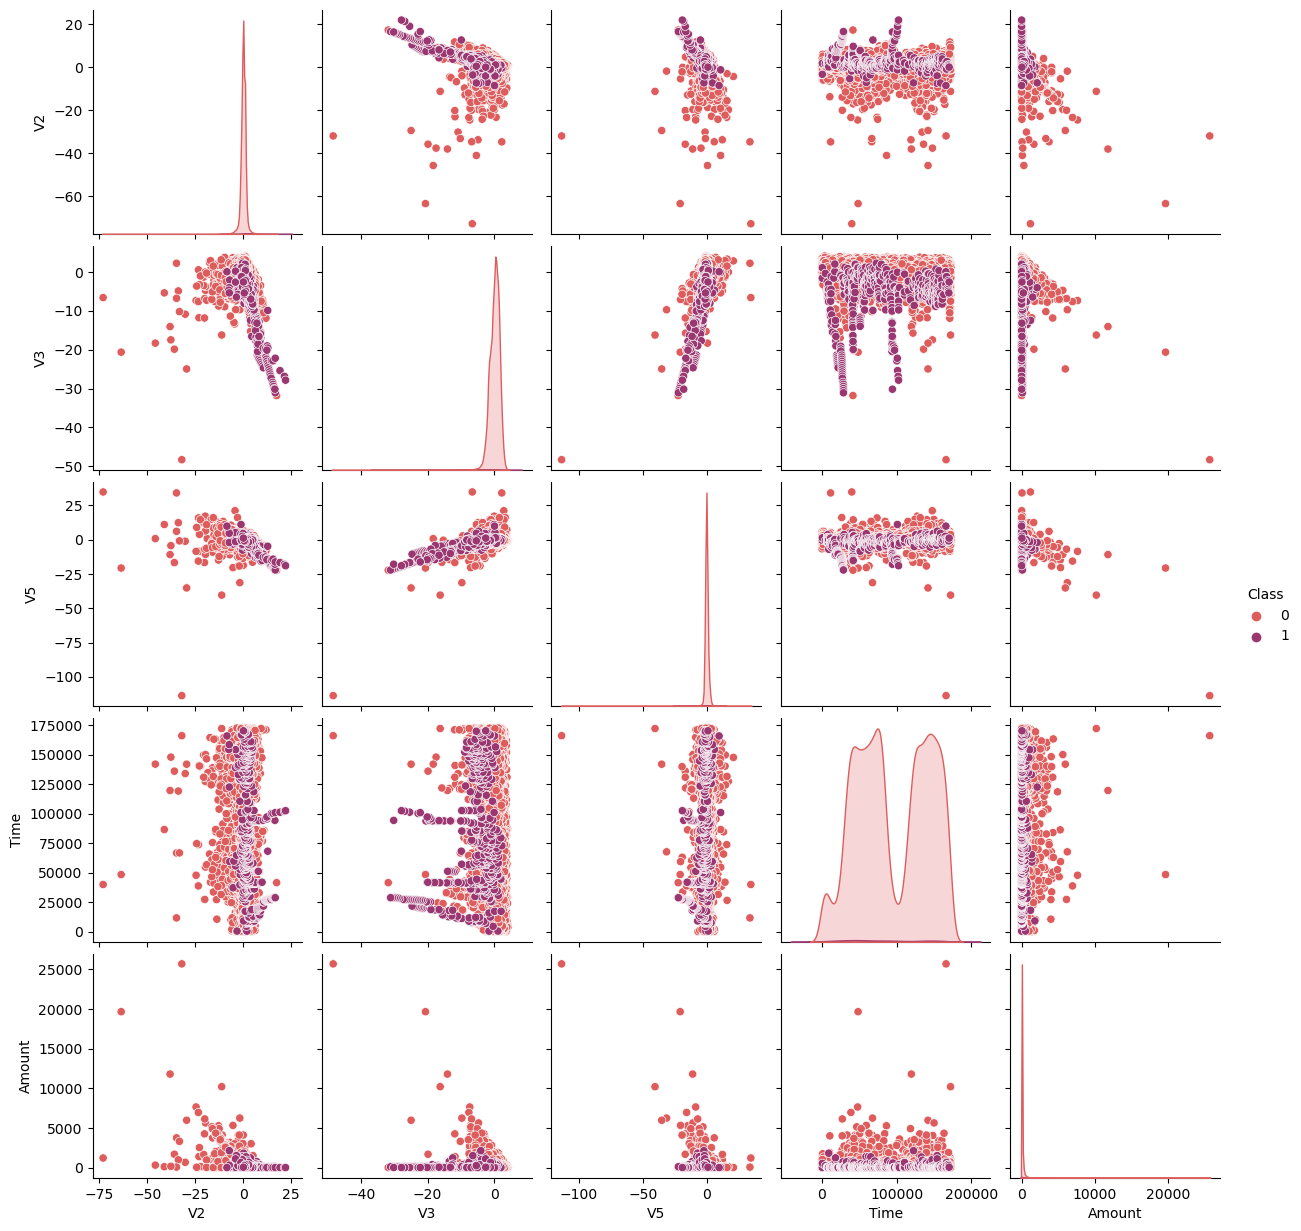

In [43]:
columns = ["V2", "V3", "V5", "Time", "Amount", "Class"]

sample_non_fraud = df[df['Class'] == 0].sample(frac=0.2)[columns]

sample_fraud = df[df['Class'] == 1][columns]

sns.pairplot(pd.concat([sample_non_fraud, sample_fraud]), hue='Class', palette="flare")

Исходя из корреляции можно утверждать то, что в основном фичи коррелируют с целевой переменной, временем и объемом транзакции. 
Попробуем удалить фичи Amount и Time.

In [6]:
df.drop(["Amount", "Time"], axis=1, inplace=True)

## 1.2 Проверка на сбалансированность

Отобразим на гистограмме сбалансированность датасета:

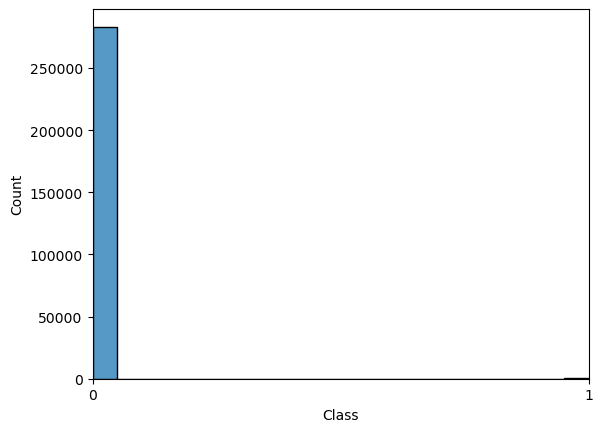

In [9]:
fig, ax = plt.subplots()
sns.histplot(df["Class"], ax=ax)
ax.set_xlim(0, 1)
ax.set_xticks([0, 1])
plt.show()

In [10]:
zeros, ones = df["Class"].value_counts()
print("Количество мошеннических транзакций: ", ones)
print("Количество честных транзакций: ", zeros)
print("Относительное количество мошеннических транзакций: ", ones / len(df))
print("Относительное количество стандартных транзакций: ", zeros / len(df))

Количество мошеннических транзакций:  473
Количество честных транзакций:  283253
Относительное количество мошеннических транзакций:  0.001667101358352777
Относительное количество стандартных транзакций:  0.9983328986416472


Выборка очень несбалансированная - у нас заметно больше данных о честных транзакциях, нежели о мошеннических. Данную задачу можно свести к задаче детектирования аномалий по большему счету, но в данном случае будем пробовать решать эту задачу как задачу классификации. С целью выравнивания мощности обоих классов будем применять метода андерсемплинга (NearMiss, RandomUnderSampler, TomekLinks, EditedNearestNeighbours) и оверсемплинга (SMOTE, ADASYN).

## 1.3 Основные статистики признаков

In [11]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,...,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,0.001667
std,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,...,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,0.040796
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000
25%,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,...,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,0.000000
50%,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,...,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,0.000000
75%,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,...,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,0.000000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,1.000000


# 2. Разделяем данные

In [9]:
!pip install imblearn

In [12]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import NearMiss, RandomUnderSampler, TomekLinks, EditedNearestNeighbours

## 2.1 Разделяем выборки на train/test

In [13]:
y = df["Class"]
X = df.drop(columns=["Class"])
print("Размер датасета: ", len(y))
print("Размер 0 класса до андерсемплинга: ", len(y[y==0]))

Размер датасета:  283726
Размер 0 класса до андерсемплинга:  283253


Сначала разделим данные на данные, на которых мы будем обучать модель и на данные, на которых мы будем ее проверять. Так или иначе, если мы производим манипуляции ресемплирования с исходным датасетом его тестовую часть это касаться не должно. Поэтому сначала данные разделим, а далее будем их ресемплить.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 21)

In [15]:
resamplers = {"Near Miss version 1" : NearMiss(version=1),
              "Near Miss version 2" : NearMiss(version=2),
              "Random Under Sampler" : RandomUnderSampler(random_state=42),
              "SMOTE" : SMOTE(k_neighbors=3),
              "ADASYN" : ADASYN(random_state=42)}

# 2.2 Сравниваем статистики тестовой и тренировочной выборок

In [21]:
cols = ["mean", "std", "min", "max"]
(X_train.describe()- X_test.describe()).loc[cols]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
mean,0.002134,-0.000713,0.003294,-0.005408,0.002732,-0.001987,0.006095,-0.000063,-0.000133,-0.004941,...,0.003271,0.002032,0.004923,-0.000997,-0.004728,-0.001666,-0.003024,-0.000801,0.000912,0.001916
std,-0.016034,0.019983,0.001281,-0.007958,0.032679,0.009568,0.027695,-0.022562,-0.004342,-0.013898,...,-0.004798,0.025510,-0.007575,0.001578,0.037578,0.002215,0.002001,-0.000198,-0.002451,-0.030640
min,9.552462,9.371029,-15.871391,0.082564,-73.315580,2.663792,2.050445,-22.528299,-0.113912,0.185077,...,-2.594493,-26.488085,-12.032778,-2.046127,-14.538015,0.011778,-3.866063,-0.535990,12.670435,-3.719188
max,0.034584,-0.590526,-5.156450,0.384127,-0.702357,49.383788,76.535033,0.838881,-5.202106,-8.413395,...,0.019858,21.601397,-4.603296,2.186815,1.725068,0.622352,-1.448738,0.297167,21.476601,-17.718199


# 3. Обучаем модели

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## 3.1 Какие метрики точности

In [17]:
from sklearn.metrics import classification_report, roc_auc_score

Для оценки качества моделей использовать accuracy_score не совсем корректно из за плохой сбалансированности выборки, т.к. в таком случае даже для константного классификатора мы бы получили прекрасную точность. Оценивать качество моделей будем с помощью метрик precision, recall, f1-score и roc-auc-score. 


## 3.2 Какая модель лучше справилась?

In [18]:
models = {"Logistic Regression" : LogisticRegression(random_state=42, max_iter=1000, n_jobs=-1), 
          "Random Forest" : RandomForestClassifier(n_jobs=-1),
          "Decision Tree" : DecisionTreeClassifier(random_state=42), 
          "Kneighbors" : KNeighborsClassifier(n_neighbors=3, algorithm="ball_tree", n_jobs=-1)}

In [19]:
reports = {}
for model_name, model in models.items():
    model_report = {}
    print(model_name, " processing")
    for resampler_name, resampler in resamplers.items():
        X_train_model, y_train_model = resampler.fit_resample(X_train, y_train)
        model.fit(X_train_model, y_train_model)
        y_pred = model.predict(X_test)
        print("\t", resampler_name, " predicted")
        model_report[resampler_name] = classification_report(y_test, y_pred), roc_auc_score(y_test, y_pred)
    reports[model_name] = model_report

Logistic Regression  processing
	 Near Miss version 1  predicted
	 Near Miss version 2  predicted
	 Random Under Sampler  predicted
	 SMOTE  predicted
	 ADASYN  predicted
Random Forest  processing
	 Near Miss version 1  predicted
	 Near Miss version 2  predicted
	 Random Under Sampler  predicted
	 SMOTE  predicted
	 ADASYN  predicted
Decision Tree  processing
	 Near Miss version 1  predicted
	 Near Miss version 2  predicted
	 Random Under Sampler  predicted
	 SMOTE  predicted
	 ADASYN  predicted
Kneighbors  processing


C:\Users\timur\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


	 Near Miss version 1  predicted


C:\Users\timur\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


	 Near Miss version 2  predicted


C:\Users\timur\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


	 Random Under Sampler  predicted


C:\Users\timur\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


	 SMOTE  predicted


C:\Users\timur\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


	 ADASYN  predicted


In [20]:
for model_name, model_report in reports.items():
    print(model_name, "\n")
    for resampler_name, resampler_report in model_report.items():
        print("\t", resampler_name, "\n", resampler_report[0])
        print("\troc_auc_score: ", resampler_report[1])
    print("====================================================")

Logistic Regression 

	 Near Miss version 1 
               precision    recall  f1-score   support

           0       1.00      0.58      0.74     84976
           1       0.00      0.96      0.01       142

    accuracy                           0.58     85118
   macro avg       0.50      0.77      0.37     85118
weighted avg       1.00      0.58      0.74     85118

	roc_auc_score:  0.7705261767365633
	 Near Miss version 2 
               precision    recall  f1-score   support

           0       1.00      0.33      0.50     84976
           1       0.00      0.92      0.00       142

    accuracy                           0.33     85118
   macro avg       0.50      0.63      0.25     85118
weighted avg       1.00      0.33      0.50     85118

	roc_auc_score:  0.6272791853739648
	 Random Under Sampler 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     84976
           1       0.04      0.92      0.08       142

    accuracy   

# Вывод
Исходя из полученных данных имеем: наилучшим классификатором оказалась логистическая регрессия с применением алгоритма оверсемплинга SMOTE:

SMOTE 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     84976
           1       0.06      0.92      0.11       142

    accuracy                           0.97     85118

	roc_auc_score:  0.9481992098514642

Наилучший результат ROC-AUC Score, близкий к единице, говорит о том, что модель хорошо различает между собой целевые классы. Высокий уровень Recall опять же указывает на то, что модель хорошо определяет как мошеннические, так и обычные транзакции. Низкий уровень precision и f1-score метрик на мошеннического класса обусловлен плохой сбалансированностью классов.